# Plan recommandation based on user behavior

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Description" data-toc-modified-id="Project-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Description</a></span></li><li><span><a href="#Data-preperation" data-toc-modified-id="Data-preperation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preperation</a></span><ul class="toc-item"><li><span><a href="#Split-the-source-data-into-a-training-set,-a-validation-set,-and-a-test-set." data-toc-modified-id="Split-the-source-data-into-a-training-set,-a-validation-set,-and-a-test-set.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Split the source data into a training set, a validation set, and a test set.</a></span></li><li><span><a href="#Making-features-&amp;-targets-datasets-for-each-dataset." data-toc-modified-id="Making-features-&amp;-targets-datasets-for-each-dataset.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Making features &amp; targets datasets for each dataset.</a></span></li></ul></li><li><span><a href="#Investigate-the-quality-of-different-models-by-changing-hyperparameters.-Briefly-describe-the-findings-of-the-study." data-toc-modified-id="Investigate-the-quality-of-different-models-by-changing-hyperparameters.-Briefly-describe-the-findings-of-the-study.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Investigate the quality of different models by changing hyperparameters. Briefly describe the findings of the study.</a></span></li><li><span><a href="#Sanity-check-to-the-model" data-toc-modified-id="Sanity-check-to-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sanity check to the model</a></span><ul class="toc-item"><li><span><a href="#K-fold-cross-validation" data-toc-modified-id="K-fold-cross-validation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>K-fold cross validation</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Confusion matrix</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

## Project Description

Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.  
Based on behavior data about subscribers who have already switched to the new plans. 
The classification task is to develop a model that will pick the right plan.  
Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. Check the accuracy using the test dataset.  

__Since you’ve already performed the data preprocessing step, you can move straight to creating the model.__

In [1]:
# pip install -U -q scikit-learn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data preperation

In [3]:
def load_data(file_name, parse_dates=None, dtype=None, sep=','):
    df=''
    
    try:
        df=pd.read_csv('datasets/{}'.format(file_name), parse_dates=parse_dates, dtype=dtype, sep=sep)
    except:
        df=pd.read_csv('/datasets/{}'.format(file_name), parse_dates=parse_dates, dtype=dtype, sep=sep)
    
        
    return df

In [4]:
df=load_data('users_behavior.csv')

df.head(2)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0


### Split the source data into a training set, a validation set, and a test set.

The data is split into 3 ways for training, validating, and testing (making sure there's no overfitting). 

In [5]:
df_train, df_valid = train_test_split(df, test_size=0.4, random_state=12345)
df_test, df_valid = train_test_split(df_valid, test_size=0.5, random_state=12345)
len(df_test), len(df_valid), len(df_train)

(643, 643, 1928)

### Making features & targets datasets for each dataset.

This is a classification problem, which it's target is the __is_ultra__ field. This field is a binary field.

In [6]:
features_train=df_train.drop('is_ultra', axis=1)
target_train=df_train['is_ultra']

features_valid=df_valid.drop('is_ultra', axis=1)
target_valid=df_valid['is_ultra']

features_test=df_test.drop('is_ultra', axis=1)
target_test=df_test['is_ultra']

features=df.drop('is_ultra', axis=1)
target=df['is_ultra']

## Investigate the quality of different models by changing hyperparameters. Briefly describe the findings of the study.

This problem is a classification problem, to understand which new plan should be proposed to the users.  
First of all, I'm building a function to calculate the accuracy of a model that is sent to it.

In [7]:
def accuracy_calculator(modelToCheck):
    modelToCheck.fit(features_train, target_train)
    predictions_valid=modelToCheck.predict(features_valid)
    accuracy_valid=accuracy_score(target_valid, predictions_valid)
    print('accuracy valid: ',accuracy_valid)

Starting with the basic __DecisionTreeClassifier__ algorithm, gets an accuracy below the 0.75 threshold.

In [8]:
model = DecisionTreeClassifier(random_state=12345)
accuracy_calculator(model)

accuracy valid:  0.7309486780715396


Running the same basic __DecisionTreeClassifier__ algorithm, but adding the __max_depth__ hyperparameter that gets us above the threshold.

In [9]:
model = DecisionTreeClassifier(random_state=12345, max_depth=3)
accuracy_calculator(model)

accuracy valid:  0.7791601866251944


Trying the __RandomForestClassifier__ algorithm. First with only 3 estimators.

In [10]:
model = RandomForestClassifier(random_state=12345, n_estimators=3)
accuracy_calculator(model)

accuracy valid:  0.7573872472783826


Running the __RandomForestClassifier__ algorithm. Now with 40 estimators.

In [11]:
model = RandomForestClassifier(random_state=12345, n_estimators=40)
accuracy_calculator(model)

accuracy valid:  0.7931570762052877


Trying the __LogisticRegression__ algorithm.

In [12]:
model = LogisticRegression(random_state=12345, solver='liblinear')
accuracy_calculator(model)

accuracy valid:  0.6889580093312597


The __RandomForestClassifier__ algorithm got the best results with 0.79. I'll run a test on the finial model.

In [13]:
model = RandomForestClassifier(random_state=12345, n_estimators=40)
accuracy_calculator(model)

accuracy valid:  0.7931570762052877


In [14]:
predictions_test=model.predict(features_test)
accuracy_test=accuracy_score(target_test, predictions_test)
'accuracy test:',accuracy_test

('accuracy test:', 0.7838258164852255)

The test got similar results, which are above the minimum threshold of 0.75.

## Sanity check to the model

### K-fold cross validation

A more accurate method for training-testing the accuracy is using the __k-fold cross validation__. Using a technic called __cross-validation__ The data is split into K sets, making K runs. In each iteration, a different set is used as a validation set, while the remaining K-1 sets are used to train a new model (after the test the model is being discarded). The accuracy score is gathered from each iteration. Usually, K=10.  

For example, in the next image K=5, the data is split into 5 sets, each iteration a different blue set is used to test the data while the other 4 green sets are used for training.

<div>
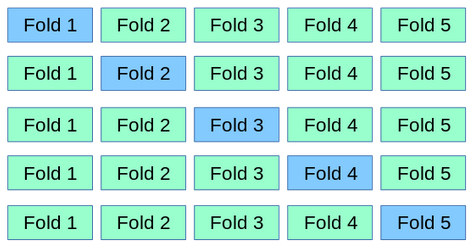
</div>

In [15]:
scores = cross_val_score(model, features, target, cv=10)
scores

array([0.81987578, 0.78881988, 0.76397516, 0.78881988, 0.82242991,
       0.80373832, 0.80062305, 0.80373832, 0.80062305, 0.80373832])

In [16]:
"%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std())

'0.80 accuracy with a standard deviation of 0.02'

Training with the full dataset, and testing with all the datasets returns even a better score of 0.8.

### Confusion matrix

Accuracy by itself can be a misleading metric, especially when there is a large class imbalance: i.e., when one feature occurs much more frequently than another.  
To check it, first I'll fill the __Confusion matrix__. This is it's structure:

<div style="float:left;">
        <table class="wikitable" style="text-align:center;">
            <tbody>
                <tr>
                    <th style="background:linear-gradient(to top right,#eaecf0 49.5%,#aaa 49.5%,#aaa 50.5%,#eaecf0 50.5%);line-height:1;">
                        <div style="margin-left:2em;text-align:right;">Predicted<br>class</div><div style="margin-right:2em;text-align:left;">Actual class</div>
                    </th>
                    <th>
                        <abbr title="Positive">Positive</abbr>
                    </th>
                    <th>
                        <abbr title="Negative">Negative</abbr>
                    </th>
                </tr>
                <tr>
                    <th>
                        <abbr title="Positive">Positive</abbr>
                    </th>
                    <td>
                        <b><abbr title="True positive">True positive</abbr></b>
                    </td>
                    <td>
                        <abbr title="False negative">False negative</abbr>
                    </td>
                </tr>
                <tr>
                    <th>
                        <abbr title="Negative">Negative</abbr>
                    </th>
                    <td>
                        <abbr title="False positive">False positive</abbr>
                    </td>
                    <td>
                        <b><abbr title="True negative">True negative</abbr></b>
                    </td>
                </tr>
            </tbody>
        </table>
    </div>

Filling the Confusion matrix using the validation dataset:

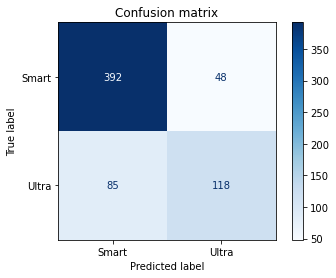

In [17]:
model = RandomForestClassifier(random_state=12345, n_estimators=40)
model.fit(features_train, target_train)

disp = ConfusionMatrixDisplay.from_estimator(
    model, features_valid, target_valid, cmap=plt.cm.Blues,
    display_labels=['Smart','Ultra']
)
disp.ax_.set_title('Confusion matrix')
plt.show();

The confusion matrix shows that there is a problem in predicting the Ultra plan. The data has an imbalance, most of the data is regarding the Smart plan.  
So I'll try running an accuracy on prediction of dummy results - predict only Smart plan (constant 0 in is_ultra).

In [18]:
dummy_target=pd.Series(0, index=target_valid)
accuracy_valid=accuracy_score(target_valid, dummy_target)
accuracy_valid

0.6842923794712286

### Conclusion

I tried 3 different models __DecisionTreeClassifier, RandomForestClassifier, LogisticRegression__, the best model was the __RandomForestClassifier__ with accuracy score of 0.79, and 0.78 for the test dataset. Running a sanity test of k-fold got even better results of 0.8, but the heatmap of the confusion matrix shows that there is a problem predicting the Ultra plan, as a result of imbalanced data - too much data is regarding the Smart plan. Testing the accuracy against dummy results got a score of 0.68.  

The data is imbalanced, and although the model got better results in its predictions, for even better results it's better to have a more balanced dataset.